In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
label = []

In [3]:
ficheiro = open("..\\Dataset\\01-03-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
#for i in range(10000):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(21) + "", '%d/%m/%Y %H:%M:%S').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [4]:
label.sort(key = lambda array : array[len(array) - 1])

In [5]:
print(label[10])

['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', 'Benign', '3389', '6', '2230949', '8', '8', '1128', '1874', '661', '0', '141', '222.6233206', '1173', '0', '234.25', '398.9009007', '1345.6157', '7.171835842', '148729.9333', '240731.5528', '953185', '56', '2230949', '318707', '389336.5405', '1146707', '56', '2089736', '298533.7143', '293598.937', '953185', '154766', '172', '172', '3.585917921', '3.585917921', '0', '1173', '176.5882353', '309.101128', '95543.50735', '1', '187.625', '141', '234.25', '8', '1128', '8', '1874', '8192', '62872', '5', '20', '0', '0', '0', '0', '0', '0', '0', '0\n', datetime.time(1, 0, 4)]


In [6]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [7]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(18)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])

In [8]:
print(str(a) + " " + str(b))

92403 235778


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [10]:
inp = []
out = []
num = 0
for i in range(len(input_label) - 20 + 1):
    aux = []
    for j in range(i, i + 20):
        aux.append(input_label[j])
    inp.append(aux)
    out.append(output_label[i + 20 - 1])

In [11]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = 0.2, shuffle = False)

In [12]:
input_labeL = []
output_label = []
inp = []
out = []
gc.collect()

30

In [13]:
inp_train = np.array(inp_train)#.reshape(len(inp_train), 78,1)
out_train = np.array(out_train)#.reshape(len(out_train),1)
inp_test = np.array(inp_test)#.reshape(len(inp_test), 78,1)
out_test = np.array(out_test)#.reshape(len(out_test),1)

In [14]:
print(inp_train.shape)

(262529, 20, 78)


In [15]:
model = keras.Sequential([
    layers.LSTM(units = 128, input_shape = (20, 78), return_sequences = True, use_bias = True),
    layers.LSTM(units = 64, return_sequences = True, use_bias = True),
    layers.LSTM(units = 32, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [16]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, epochs= 10, verbose = 1)

Epoch 1/10
7384/7384 [==============================] - 163s 21ms/step - loss: 0.5344 - accuracy: 0.7625 - val_loss: 0.8005 - val_accuracy: 0.5164
Epoch 2/10
7384/7384 [==============================] - 145s 20ms/step - loss: 0.5094 - accuracy: 0.7703 - val_loss: 0.6862 - val_accuracy: 0.5421
Epoch 3/10
7384/7384 [==============================] - 146s 20ms/step - loss: 0.5001 - accuracy: 0.7727 - val_loss: 0.6898 - val_accuracy: 0.5335
Epoch 4/10
7384/7384 [==============================] - 146s 20ms/step - loss: 0.4947 - accuracy: 0.7749 - val_loss: 0.7146 - val_accuracy: 0.5459
Epoch 5/10
7384/7384 [==============================] - 150s 20ms/step - loss: 0.4936 - accuracy: 0.7741 - val_loss: 0.7441 - val_accuracy: 0.5334
Epoch 6/10
7384/7384 [==============================] - 151s 20ms/step - loss: 0.4912 - accuracy: 0.7747 - val_loss: 0.6836 - val_accuracy: 0.5622
Epoch 7/10
7384/7384 [==============================] - 147s 20ms/step - loss: 0.4880 - accuracy: 0.7761 - val_loss: 0

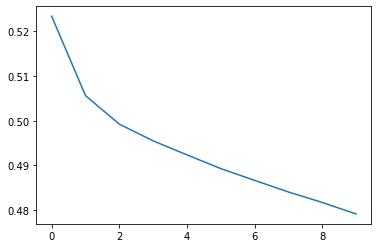

In [18]:
plt.plot(train.history["loss"])
plt.show()

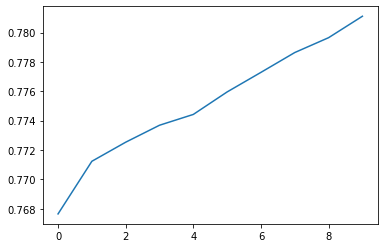

In [19]:
plt.plot(train.history["accuracy"])
plt.show()

In [20]:
model.save("LSTMInfiltrationIDS(01-03-2018)V2.h5")

In [21]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [22]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [23]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[53882  1101]
 [ 5676  4977]]


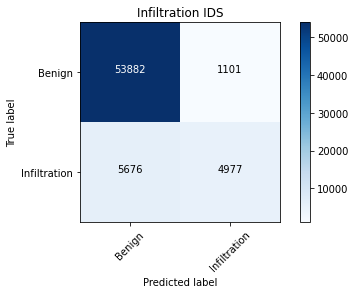

In [23]:
labels = ["Benign", "Infiltration"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Infiltration IDS")

Confusion matrix, without normalization
[[53735  1245]
 [ 5011  5642]]


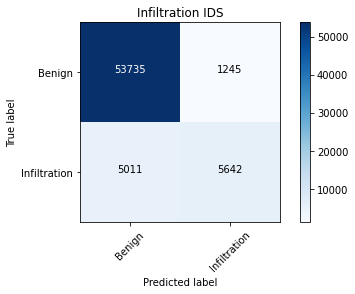

In [23]:
labels = ["Benign", "Infiltration"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Infiltration IDS")

Confusion matrix, without normalization
[[51065  3909]
 [ 4240  6413]]


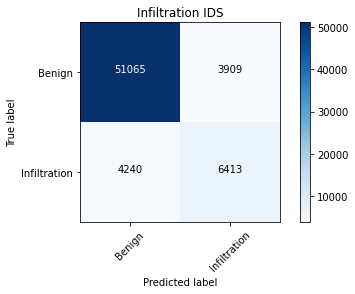

In [23]:
labels = ["Benign", "Infiltration"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Infiltration IDS")

Confusion matrix, without normalization
[[54406   574]
 [ 5348  5305]]


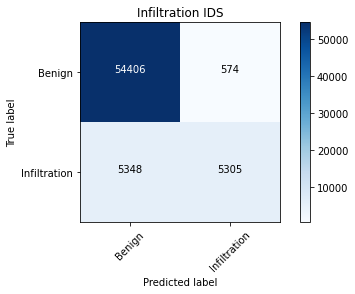

In [24]:
labels = ["Benign", "Infiltration"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Infiltration IDS")